# Replicating _Intermediary asset pricing: New evidence from many asset classes_

### James, Young Jin Song, Jaehwa Youm, Monica Panigrahy, and Jacob Simeral

In [1]:
import load_nyfed
load_nyfed.pull_nyfed_primary_dealers_list(load_nyfed.url)
# import Table_01
# import Table_A1
# import Table_A1_to_latex
# import Table_01_to_latex

import pandas as pd
import wrds
import config
from datetime import datetime
import unittest
import matplotlib.pyplot as plt
import numpy as np
import Table02Analysis
import Table02Prep

import Table03Load
import Table03Analysis
import Table03

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

File saved to cache at data/pulled/nyfed_primary_dealers_list.xls.


/Users/wenlan/python-github/finm-32900-final-project/src/Table02Prep.py:406: SyntaxWarning: invalid escape sequence '\l'
  \caption{""" + caption + """}


### 1. Table 01

#### 1-1 Pull the NY Fed primary dealers list from the NY Fed website

* Utilize the pull_nyfed_primary_dealers_list function, as defined in the 'load_nyfed.py' file, to download the 'nyfed_primary_dealers_list.xls' Excel file. This function saves the downloaded file into the 'data/pulled' directory.
* This process is managed by the task_pull_nyfed() function in the 'dodo.py' file. It handles downloading the 'nyfed_primary_dealers_list.xls' Excel file and saving it in the 'data/pulled' directory.

#### 1-2 Load the NY Fed primary dealers list from the cached files in the 'data/pulled' directory

* Use the 'load_nyfed_primary_dealers_list' function to access the NY Fed primary dealers list from the cached data in the 'data/pulled' directory. Focus on the '2000s' and 'Dealer Alpha' worksheets to extract the list of primary dealers as of February 2014, aiming to replicate Table 1.

#### 1-3 Replicate Table 1 using data from the 'nyfed_primary_dealers_list.xls' Excel file

* The '2000s' worksheet provides annual listings of primary dealers from 2000 to 2014; refine this data to isolate dealers active as of February 2014.

* The 'Dealer Alpha' worksheet covers all primary dealers from 1960 to 2014, including their start and end dates. Clean this data to facilitate matching with the primary dealer listings found in the '2000s' worksheet."

* Match the 2014 primary dealer list with their start dates, taking care to handle name discrepancies across two Excel sheets, such as extra spaces or differences in punctuation.
* Also, for dealers who were active, paused, and then resumed, use their latest start date. The code should adjust for these variations to correctly align with the table in the paper. Lastly, arrange the start dates from earliest to most recent.

* The author manually matched dealers with their publicly-traded holding companies. For the replication, a 'ticks.csv' file was created and placed in the 'data/manual' directory, containing the mapping information between primary dealers and their holding companies. Subsequently, an additional column was introduced to the 'merged_df' table to display the corresponding holding company for each dealer, utilizing the information from the 'ticks.csv' file.

#### 1-4 Convert the table to LaTeX format using the to_latex() function

* The to_latex function, located in the 'Table_01_to_latex.py' file, is utilized to convert the 'merged_df_final' table into LaTeX format. The resulting LaTeX code is then saved into the 'Table_01_to_latex.tex' file within the output directory.
* Before converting the table to LaTeX format, replace '&' with '\\&' in company names. Since LaTeX uses '&' to recognize table columns, an unescaped '&' in company names can cause errors when generating the table in LaTeX format.

#### 1-5 Complete the LaTeX setup to replicate Table 1, incorporating the formatted table

* Use the 'Table_01_to_latex.tex' file from the 'output' directory, which contains the table in LaTeX format, to create a 'Report_Table_01.tex' file in the 'reports' directory. This action replicates the entire table. The table is inserted into 'Report_Table_01.tex' by employing the '\input{\PathToOutput/Table_01_to_latex.tex}' command.

### 2. Table A.1

#### 2-1 Load the NY Fed primary dealers list from the cached files in the 'data/pulled' directory

* Use the 'load_nyfed_primary_dealers_list' function to access the NY Fed primary dealers list from the cached data in the 'data/pulled' directory. This time, focus on the 'Dealer Alpha' worksheets to extract the list of primary dealers from 1960 to 2014, including their start and end dates, with the aim of replicating Table A.1.

#### 2-2 Replicate Table A.1 using data from the 'nyfed_primary_dealers_list.xls' Excel file

* Clean the data from the 'Dealer Alpha' worksheet to replicate Table A.1, including formatting dates and marking companies still active as primary dealers with 'Current' in the end date column, etc.

#### 2-3 Convert the table to LaTeX format using the to_latex() function

* The to_latex function, found in the 'Table_A1_to_latex.py' file, is used to convert the 'df_dealer_alpha' table into LaTeX format. The resulting LaTeX code is then saved in the 'Table_A1_to_latex.tex' file within the output directory.

* As described in the Table 01 replication process, before converting the table to LaTeX format, replace '&' with '\\&' in company names. This is necessary because LaTeX uses '&' to recognize table columns, and an unescaped '&' in company names can cause errors when generating the table in LaTeX format.
* To match the format presented in Table A.1, separate the primary dealer list at the midpoint, adding a separator column for visual division

#### 2-4 Complete the LaTeX setup to replicate Table A.1, incorporating the formatted table

* To replicate the entire table in a report, use the 'Table_A1_to_latex.tex' file from the 'output' directory. Create a 'Report_Table_A1.tex' file in the 'reports' directory and insert the table by using the command '\input{\PathToOutput/Table_A1_to_latex.tex}'.

#### 2-5 Limitations on Replicating Table A.1

* While the replication closely mirrors Table A.1 in format, the list of primary dealers, and data accuracy including start and end dates, a perfect match with the original Table A.1 in the paper is not achieved for several reasons: 

* The author used abbreviated company names, shortened manually, whereas the Excel file from the NY Fed features the complete names. 
* The author consolidated the list by combining entries that, despite name changes, continued as primary dealers. In contrast, the Excel file from the NY Fed presents a more extensive list by including all dealers, accounting for their names before and after changes, resulting in a higher number of entries.
* Due to the differences in abbreviation usage and the consolidation approach by the author, conducting precise unit testing was challenging, as the subjectivity in primary dealer name abbreviation and entry combination affected the direct comparison.

### Table 02

The following code reads in a manual data file that contains necessary information on primary dealers from 1960-2012 and then merges it with the CRSP Compustat Merge Linkhist table to get additional information on each, such as the SIC codes. The linkhist table is also used as the main reference table to pull the other comparison groups for the table.

In [2]:
db = wrds.Connection(wrds_username=config.WRDS_USERNAME)
merged_main, link_hist = Table02Prep.prim_deal_merge_manual_data_w_linktable()
merged_main

Loading library list...
Done


,gvkey,conm,sic,Start Date,End Date
0,15504,ABN-AMRO HOLDINGS NV,6020,9/29/1998,9/15/2006
11,3243,CITIGROUP INC,6199,5/19/1960,4/17/2000
38,7647,BANK OF AMERICA CORP,6020,4/18/1994,9/30/1997
79,2968,JPMORGAN CHASE & CO,6020,4/1/1999,8/1/2004
123,7647,BANK OF AMERICA CORP,6020,11/17/1971,4/15/1994
...,...,...,...,...,...
1759,144496,UBS GROUP AG,6282,12/7/1989,Current
1772,7267,MERRILL LYNCH & CO INC,6211,6/17/1976,5/15/1978
1810,15362,WESTPAC BANKING CORP,6020,2/4/1987,6/27/1990
1834,7267,MERRILL LYNCH & CO INC,6211,2/26/1976,4/18/1978


In [11]:
link_hist

,gvkey,LPERMCO,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,conm,curcd,costat,sic
0,1000,23369,1970-12-31,1970.0,INDL,C,D,STD,AE.2,A & E PLASTIK PAK INC,USD,I,3089
1,1000,23369,1971-12-31,1971.0,INDL,C,D,STD,AE.2,A & E PLASTIK PAK INC,USD,I,3089
2,1000,23369,1972-12-31,1972.0,INDL,C,D,STD,AE.2,A & E PLASTIK PAK INC,USD,I,3089
3,1000,23369,1973-12-31,1973.0,INDL,C,D,STD,AE.2,A & E PLASTIK PAK INC,USD,I,3089
4,1000,23369,1974-12-31,1974.0,INDL,C,D,STD,AE.2,A & E PLASTIK PAK INC,USD,I,3089
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320693,296318,53885,2012-12-31,2012.0,INDL,C,D,STD,ORIG,OCEAN RIG UDW INC,USD,I,1381
320711,296753,53991,2012-12-31,2012.0,INDL,C,D,STD,AVGTF,AVG TECHNOLOGIES NV,USD,I,7372
320724,296885,54281,2012-12-31,2012.0,INDL,C,D,STD,RDHL,REDHILL BIOPHARMA LTD,USD,A,2836
320747,297209,53928,2011-12-31,2011.0,INDL,C,D,STD,PACDQ,PACIFIC DRILLING SA,USD,A,1381


As mentioned above, the next step is now to use the linkhist table to determine what the other comparison groups are. We use SIC codes to determine broker dealers and banks, and we make sure to exclude any firms that are already in the primary dealer group so we do not have duplicates. Below is the reference table for broker dealers, which had explicit SIC codes mentioned in the paper - banks did not have explicit SIC codes mentioned and required research.

In [3]:
comparison_group_link_dict = Table02Prep.create_comparison_group_linktables(link_hist, merged_main)
comparison_group_link_dict['PD']

,gvkey,conm,sic,Start Date,End Date
0,15504,ABN-AMRO HOLDINGS NV,6020,9/29/1998,9/15/2006
11,3243,CITIGROUP INC,6199,5/19/1960,4/17/2000
38,7647,BANK OF AMERICA CORP,6020,4/18/1994,9/30/1997
79,2968,JPMORGAN CHASE & CO,6020,4/1/1999,8/1/2004
123,7647,BANK OF AMERICA CORP,6020,11/17/1971,4/15/1994
...,...,...,...,...,...
1759,144496,UBS GROUP AG,6282,12/7/1989,Current
1772,7267,MERRILL LYNCH & CO INC,6211,6/17/1976,5/15/1978
1810,15362,WESTPAC BANKING CORP,6020,2/4/1987,6/27/1990
1834,7267,MERRILL LYNCH & CO INC,6211,2/26/1976,4/18/1978


In [10]:
comparison_group_link_dict.keys()

dict_keys(['BD', 'Banks', 'Cmpust.', 'PD'])

We then used each of the reference tables (primary dealers, broker dealers, banks, all firms in Compustat) and pulled data from the Compustat Fundamentals Quarterly table. The paper mentioned use of monthly data, but there was no apparent monthly table for financial statement data from Compustat. This led to some confusion about how these authors generated their ratios - I am wondering if they computed monthly ratios given what months came out of annual and then took the average.

Below is the dataset for broker dealers. We calculate or directly pull the values we need in our query so we don't need to do it after. It was mentioned in class this was a best practice because it would run on WRDS servers.

In [4]:
datasets = Table02Prep.pull_data_for_all_comparison_groups(db, comparison_group_link_dict)
datasets['BD']

,datadate,total_assets,book_debt,book_equity,market_equity,gvkey,conm
0,1983-06-30,NaN,NaN,NaN,NaN,004804,FLORIDA SUN INTERNATIONAL
1,1970-03-31,NaN,NaN,NaN,NaN,004037,DONALDSON LUFKIN & JENRETTE
2,1970-06-30,NaN,NaN,NaN,NaN,004037,DONALDSON LUFKIN & JENRETTE
3,1970-09-30,NaN,NaN,NaN,NaN,004037,DONALDSON LUFKIN & JENRETTE
4,1970-12-31,NaN,NaN,39.461,71.812125,004037,DONALDSON LUFKIN & JENRETTE
...,...,...,...,...,...,...,...
5886,2011-12-31,660.621,504.137,156.434,156.921050,177255,JMP GROUP LLC
5887,2012-03-31,664.961,499.535,165.339,168.352560,177255,JMP GROUP LLC
5888,2012-06-30,685.928,507.875,177.947,140.539380,177255,JMP GROUP LLC
5889,2012-09-30,684.482,510.672,173.649,124.655940,177255,JMP GROUP LLC


We then prep that data further by aggregating by year and standardizing the date to the first of the year. We also convert the datadate to a datetime column that can be sliced.

In [5]:
prepped_datasets = Table02Prep.prep_datasets(datasets)
prepped_datasets['Banks']

,datadate,total_assets,book_debt,book_equity,market_equity
0,1961-12-31,1.576358e+04,9.510427e+03,38.218,0.000000e+00
1,1962-01-31,1.576358e+04,9.510427e+03,38.218,0.000000e+00
2,1962-02-28,1.576358e+04,9.510427e+03,38.218,0.000000e+00
3,1962-03-31,5.271443e+04,1.737117e+04,4768.189,9.480914e+03
4,1962-04-30,5.271443e+04,1.737117e+04,4768.189,9.480914e+03
...,...,...,...,...,...
608,2012-08-31,1.422168e+07,1.312939e+07,1059816.065,9.601542e+05
609,2012-09-30,1.455478e+07,1.342757e+07,1093982.278,1.017572e+06
610,2012-10-31,1.454541e+07,1.341925e+07,1092938.016,1.015913e+06
611,2012-11-30,1.454541e+07,1.341925e+07,1092938.016,1.015913e+06


In [6]:
prepped_datasets.keys()

dict_keys(['BD', 'Banks', 'Cmpust.', 'PD'])

We then weave in some of our analysis into the process, whenever the necessary dataset for the analysis is first available. Below is our main table of ratios, where we have computed the
$$
\frac{\text{Primary dealers amount}}{\text{Comparison group amount (less PD) + Primary dealers amount}}
$$

In [7]:
Table02Analysis.create_summary_stat_table_for_data(datasets)
table = Table02Prep.create_ratios_for_table(prepped_datasets)
table

,total_assets_BD,book_debt_BD,book_equity_BD,market_equity_BD,total_assets_Banks,book_debt_Banks,book_equity_Banks,market_equity_Banks,total_assets_Cmpust.,book_debt_Cmpust.,book_equity_Cmpust.,market_equity_Cmpust.,Period
datadate,,,,,,,,,,,,,
1962-03-31,NaN,NaN,NaN,NaN,0.138426,0.201988,0.138523,0.170082,0.138426,0.201988,0.138523,0.169240,1960-2012
1962-04-30,NaN,NaN,NaN,NaN,0.138426,0.201988,0.138523,0.170082,0.138426,0.201988,0.138523,0.169240,1960-2012
1962-05-31,NaN,NaN,NaN,NaN,0.138426,0.201988,0.138523,0.170082,0.138426,0.201988,0.138523,0.169240,1960-2012
1962-06-30,NaN,NaN,NaN,NaN,0.151775,0.197383,0.163948,0.158491,0.151775,0.197383,0.163948,0.148111,1960-2012
1962-07-31,NaN,NaN,NaN,NaN,0.151775,0.197383,0.163948,0.158491,0.151775,0.197383,0.163948,0.148111,1960-2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-08-31,0.985992,0.986878,0.972138,0.956211,0.620576,0.624304,0.568425,0.484757,0.280738,0.321994,0.094162,0.035569,1990-2012
2012-09-30,0.985891,0.986773,0.972104,0.960382,0.616681,0.620392,0.564025,0.491356,0.278086,0.319294,0.093274,0.036879,1990-2012
2012-10-31,0.985901,0.986764,0.972450,0.961366,0.616651,0.620295,0.565073,0.495202,0.278123,0.319176,0.093770,0.037376,1990-2012


We create a figure that can give the reader insight into how the ratios have shifted over time for each category and comparison group. We had to clean some of the data and fill null values to have the graph look reasonable but without changing the overall shape of it too dramatically.
Lastly, we get our final table which was what we were trying to replicate from the paper. This table is then converted to LaTeX and outputted to a .tex file.

In [9]:
formatted_table = Table02Prep.format_final_table(table)
formatted_table

Metric    Total assets                     Book debt                      \
Source              BD     Banks   Cmpust.        BD     Banks   Cmpust.   
Period                                                                     
1960-2012     0.907413  0.335218  0.144136  0.907126  0.336071  0.167885   
1960-1990     0.907818  0.194376  0.093248  0.908021  0.192445  0.108998   
1990-2012     0.904160  0.511573  0.206257  0.903151  0.515775  0.239902   

Metric    Book equity                     Market equity                      
Source             BD     Banks   Cmpust.            BD     Banks   Cmpust.  
Period                                                                       
1960-2012    0.902788  0.323040  0.052471      0.896336  0.332104  0.037070  
1960-1990    0.887261  0.226258  0.046614      0.856831  0.244102  0.034448  
1990-2012    0.920030  0.446164  0.058998      0.940735  0.444364  0.039868

Loading library list...
Done


Metric    Total assets                      Book debt                      \
Source              BD     Banks   Cmpust.         BD     Banks   Cmpust.   
Period                                                                      
1960-2012    33.652762  0.661978  0.176940  37.035810  0.678106  0.217168   
1960-1990    46.901544  0.237302  0.107453  52.788031  0.240150  0.132358   
1990-2012    21.003979  1.188556  0.261451  22.083209  1.220522  0.320265   

Metric    Book equity                     Market equity                      
Source             BD     Banks   Cmpust.            BD     Banks   Cmpust.  
Period                                                                       
1960-2012   10.707183  0.532141  0.057686     11.818654  0.568220  0.040599  
1960-1990    7.193194  0.290527  0.053897      6.384165  0.344046  0.040073  
1990-2012   13.881341  0.836551  0.061418     17.562464  0.854486  0.040620

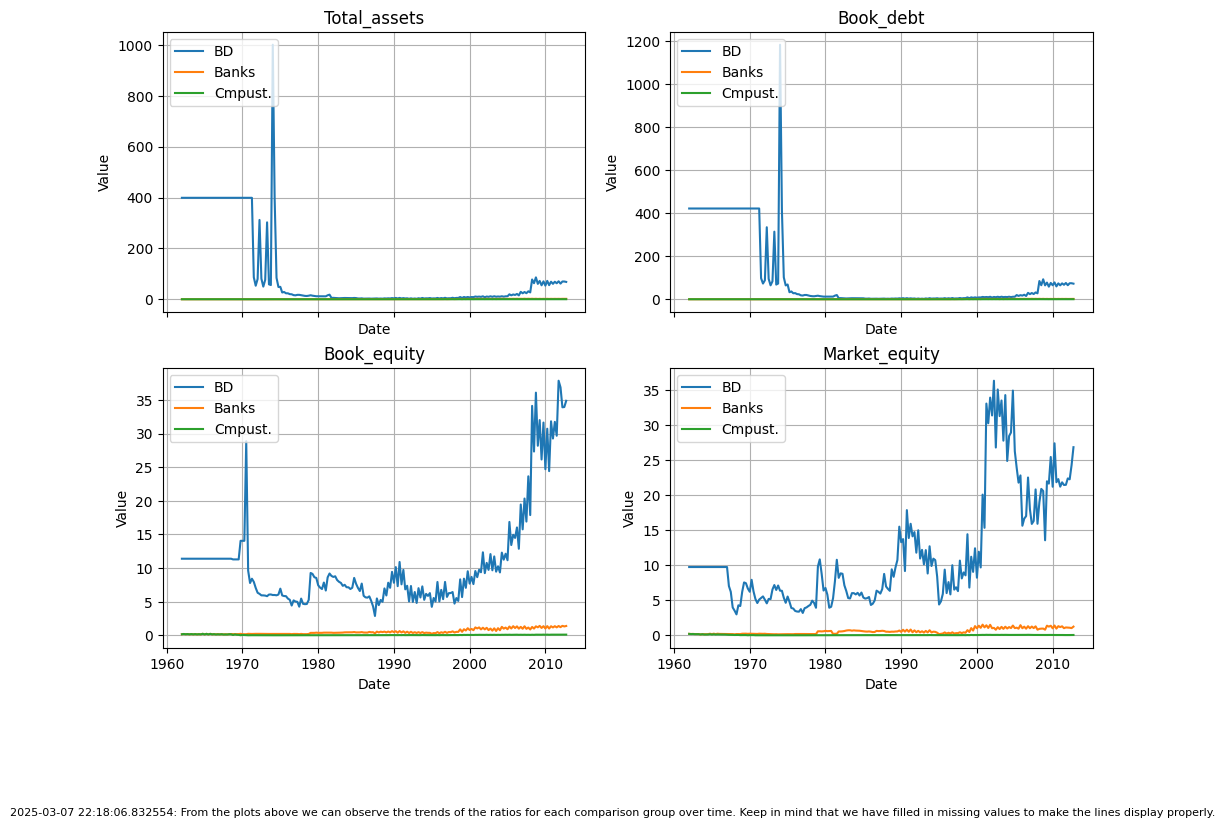

In [9]:
updated_table = Table02Prep.main(UPDATED=False)
updated_table